<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Aprendizaje_Supervisado_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Aprendizaje Supervisado: Regresión Lineal**

El **algoritmo de regresión lineal **es un método estadístico que busca modelar la relación entre una variable dependiente (a menudo denotada como \( Y \)) y una o más variables independientes (denotadas como \( X \)). La regresión lineal asume que existe una relación lineal entre las variables.

Dos tipos principales de regresión lineal son:

1. **Regresión Lineal Simple:** Se utiliza para modelar la relación entre dos variables, una dependiente y una independiente. La relación se representa mediante una línea recta (llamada línea de regresión).

2. **Regresión Lineal Múltiple:** Se utiliza para modelar la relación entre una variable dependiente y dos o más variables independientes.

El objetivo del algoritmo de regresión lineal es encontrar los valores de los coeficientes que minimicen la suma de los errores cuadrados (la diferencia entre los valores observados y los valores predichos por el modelo) a través de todos los puntos de datos.

En términos prácticos, la regresión lineal se utiliza para:
- Predecir valores de una variable basados en los valores de otra(s) variable(s).
- Entender cuál es la relación entre las variables.
- Evaluar la influencia de una o varias variables independientes sobre una variable dependiente.


## Métricas para evaluar la Regresión Lineal
- **Error Cuadrático Medio (MSE)**: Es el promedio de los errores al cuadrado entre las predicciones y los valores reales. Cuanto más pequeño es el MSE, mejor es el modelo.
- **Raíz del Error Cuadrático Medio (RMSE)**: Es simplemente la raíz cuadrada del MSE. Proporciona una idea de cuánto se equivoca el modelo en sus predicciones en las mismas unidades que la variable objetivo.
- **Error Absoluto Medio (MAE)**: Es el promedio de los errores absolutos entre las predicciones y los valores reales. Es menos sensible a los errores grandes y extremos que el MSE.
- **Coeficiente de Determinación \( R^2 \)**: Representa la proporción de la variación total de la variable dependiente (población) que es predicha por las variables independientes (año). Un \( R^2 \) de 1 indica que el modelo de regresión predice perfectamente la variabilidad de la variable dependiente.


Error Cuadrático Medio (MSE): 9575.446916494006
Raíz del Error Cuadrático Medio (RMSE): 97.85421256386465
Error Absoluto Medio (MAE): 86.14412786088579
Coeficiente de Determinación R^2: 0.9481064906104012


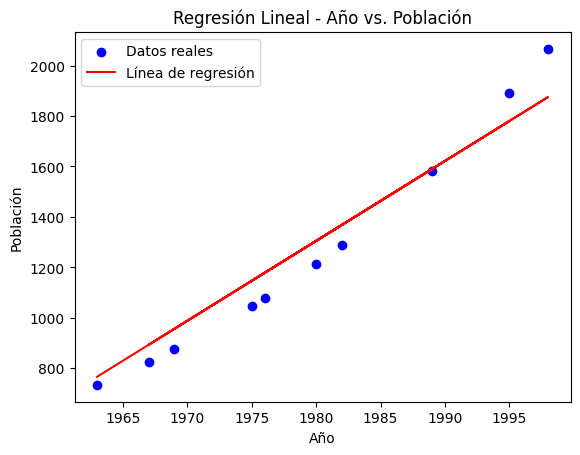

In [6]:
# 1. Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 2. Cargamos los datos
data = pd.read_csv("https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/synthetic_population.csv")

# 3. Preprocesamos los datos
# Convertimos el año y la población en matrices y las redimensionamos para ser adecuadas para el modelo
X = data['year'].values.reshape(-1,1)  # Características (año)
y = data['population'].values  # Variable objetivo (población)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluamos el modelo
# Realizamos predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos las métricas
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y_test, y_pred)  # Error absoluto medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R^2

# Imprimimos las métricas
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación R^2: {r2}")

# 6. Visualizamos los resultados
# Graficamos los datos reales y la línea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.title("Regresión Lineal - Año vs. Población")
plt.xlabel("Año")
plt.ylabel("Población")
plt.legend()
plt.show()

# Generador de datos sinteticos para la Regresion Lineal

## year
## population

In [1]:
import pandas as pd

# Parámetros
start_year = 1950
initial_population = 500
growth_rate = 0.03
years = 50

# Generación de datos sintéticos
years_list = [start_year + i for i in range(years)]
populations_list = [int(initial_population * (1 + growth_rate)**i) for i in range(years)]

# Creación del DataFrame
population_df = pd.DataFrame({
    'year': years_list,
    'population': populations_list
})

# Guardado en archivo CSV
population_df.to_csv("synthetic_population.csv", index=False)
